In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/drawndata1.csv')

In [3]:
data

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a
...,...,...,...
247,186.111898,41.435729,a
248,53.758007,1.473481,a
249,45.915907,23.502998,a
250,110.652516,12.141801,a


In [4]:
X = data[['x', 'y']].values
y = data["z"] == "a"

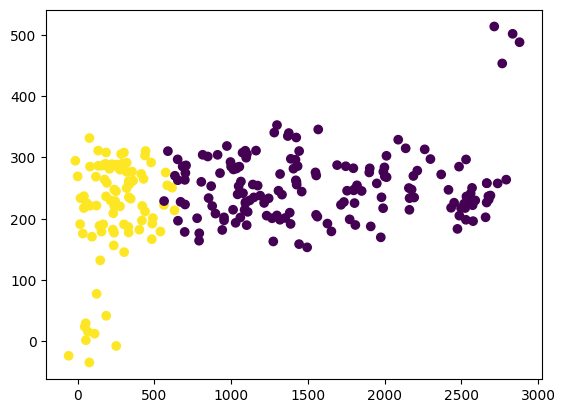

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

#scaler = StandardScaler()
scaler = QuantileTransformer(n_quantiles=100)

X_scaled = scaler.fit_transform(X)

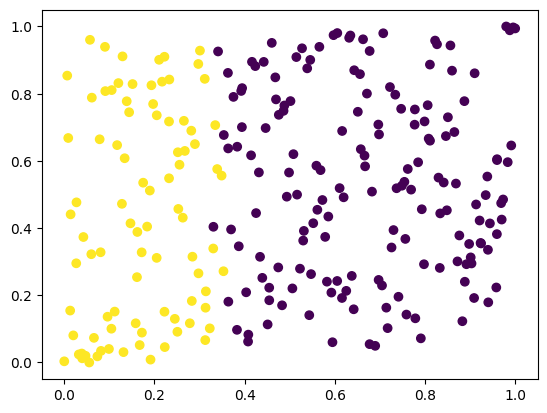

In [7]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.show()

In [8]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

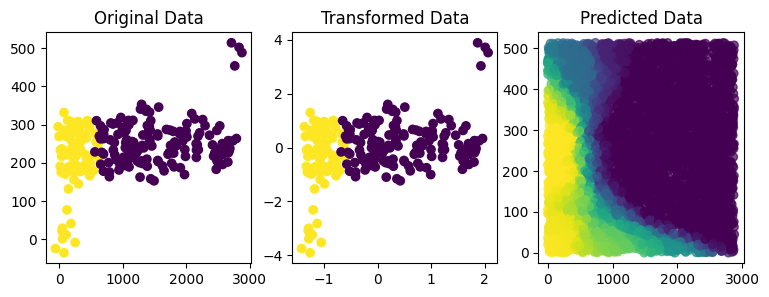

In [9]:
plot_output(StandardScaler())

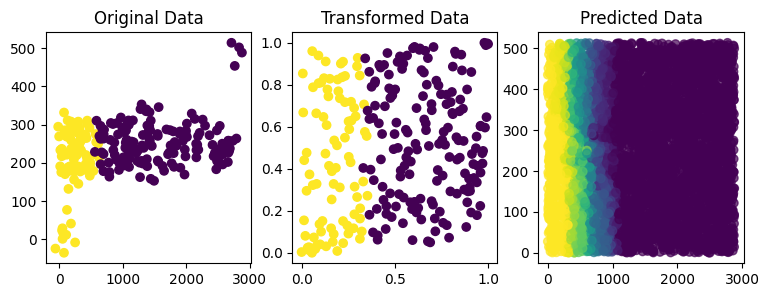

In [10]:
plot_output(QuantileTransformer(n_quantiles=100))

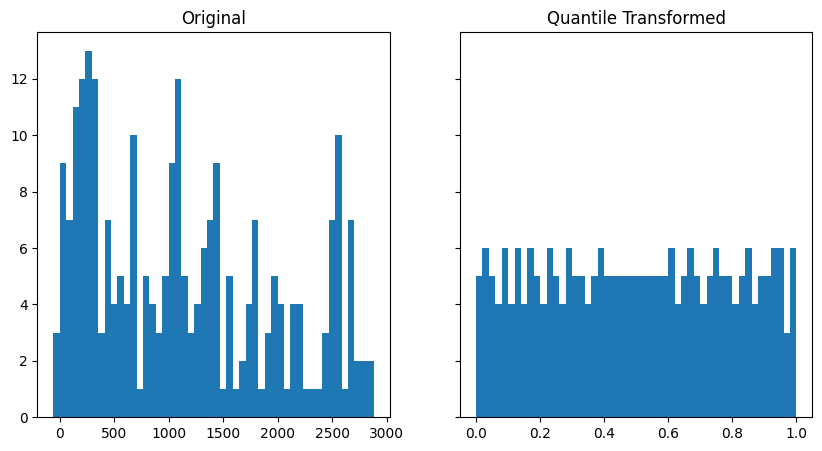

In [11]:
from sklearn.preprocessing import QuantileTransformer

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axs[0].hist(X[:,0], bins=50)
axs[0].set_title('Original')

axs[1].hist(QuantileTransformer(n_quantiles=100).fit_transform(X[:, 0].reshape(-1, 1)), bins=50)
axs[1].set_title('Quantile Transformed')

plt.show()

Let's do something for fun

I'm gonna take a new dataset with two classes that are apparently not separable for a line

In [12]:
data2 = pd.read_csv('../../data/drawndata2.csv')

In [15]:
X2 = data2[['x', 'y']].values
y2 = data2["z"] == "a"

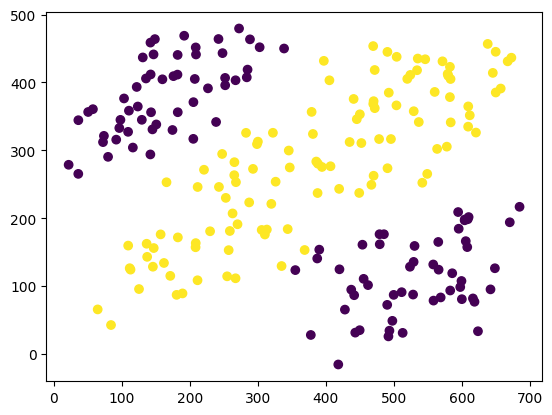

In [17]:
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X2, y2)
y_predict = mod.predict(X2)

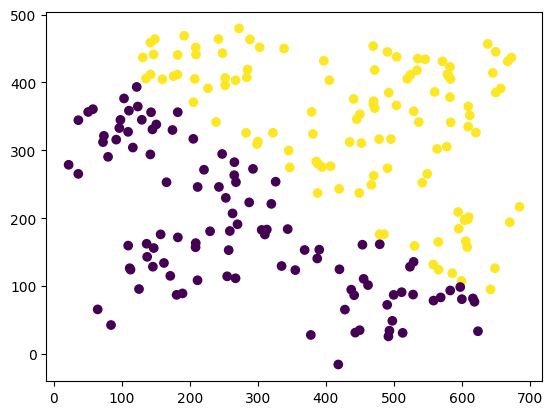

In [77]:
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=y_predict)
plt.show()

If we introduce polynomial (beyond linear) factors in the set, logistic regression might work

In [105]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LogisticRegression())
])

pipe.fit(X2, y2)
y_predict = pipe.predict(X2)

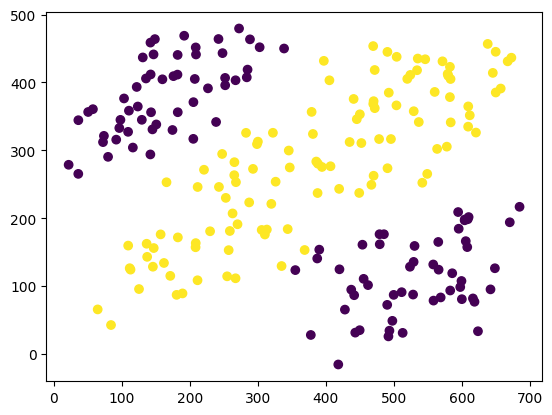

In [79]:
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=y_predict)
plt.show()

Much better!

Now, what if we do PCA on all the features?

In [106]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

poly = pipe.named_steps['poly']
X2_poly = poly.transform(X2)

def pca_keep_n_componentes(n):    
    pca = PCA(n_components=n)
    pca.fit(X2_poly)

    #logistic regression with pca components
    X2_pca = pca.transform(X2_poly)
    mod.fit(X2_pca, y2)
    y_pca_predict = mod.predict(X2_pca)

    return accuracy_score(y2, y_pca_predict)

In [108]:
#take into account that there's too few data to make a good analysis
pca_keep_n_componentes(2), pca_keep_n_componentes(3), pca_keep_n_componentes(4)

(0.5898617511520737, 1.0, 1.0)